# MNIST

- "hello world" of machine learning
- set of 70,000 small images of handwritten digits
- Each image has 784 features (28x28 pixels; each pixel has intensity from 0 (white) to 255 (black)).
28*28=784

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

/home/malayaja/anaconda3/envs/handsonml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

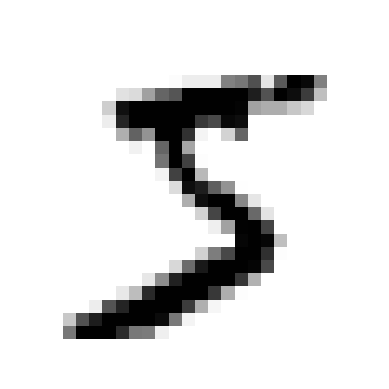

In [10]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [11]:
y[0]

'5'

In [12]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Training a Binary Classifier

In [13]:
y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")

In [14]:
y_train_5[:5], y_test_5[:5]

(array([ True, False, False, False, False]),
 array([False, False, False, False, False]))

In [15]:
from sklearn.linear_model import SGDClassifier
# stochastic gradient descent classifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## 1. Measuring Accuracy Using Cross-Validation 

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Note, accuracy = ratio of correct predictions to total observations

Wow, 95% + accuracy?<br>
Before we get too excited, let's look at a dummy classifier that classifies every single image in the most frequent class, which is the negative class (i.e. not 5) in this case.

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [22]:
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [23]:
any(dummy_clf.predict(X_train))

False

In [24]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

- The dummy classifier has 90% + accuracy! Doesn't make sense, does it.
- This demonstrates why accuracy is generally not the preferred performance measure for classifiers, esp when dealing with skewed datasets.
- What's better? The confusion matrix.

## 2. Confusion Matrices

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

- row represents actual class, column represents predicted class.

<img src="ConfusionMatrix.png">

Precision = TP/(TP + FP)<br>
Recall = TP/(TP + FN)

## 3. Precision and Recall

In [29]:
from sklearn.metrics import precision_score, recall_score

In [30]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

^This means:
- When the model claims an image represents a 5, it is correct only 83.7% of the time.
- The model only detects 65.1% of the 5s.

F1 score is the harmonic mean of precision and recall.

$F_{1} = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

- the harmonic mean gives much more weight to low values. This means that we will get a high F1 score if both recall and
precision are high.

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

- The F1 score favours classifiers that have similar precision and recall.
- This may not be what we want in all situations - sometimes we may want high precision, and sometimes we may want high recall.

## 4. Precision/Recall Trade-Off

- Increasing precision reduces recall, and increasing recall reduces precision. This trade-off is mediated by a decision threshold based on which the model classifies.

In [34]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
threshold = 0
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

array([ True])

In [36]:
threshold = 3000
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

array([False])

Raise threshold => FN increase => Recall decreases.

So, how to decide which threshold to use?

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

In [55]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

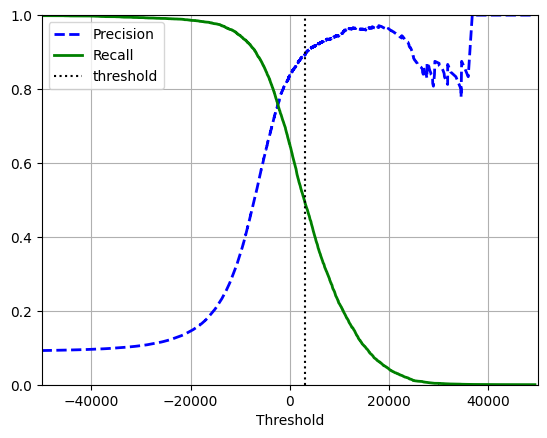

In [56]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlim([-50000, 50000])
plt.ylim([0, 1])
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
idx_3000 = (thresholds >= 3000).argmax()  # first index ≥ threshold
idx_3000

56978

In [58]:
idx_0 = (thresholds >= 0).argmax()  # first index ≥ threshold
idx_0

55783

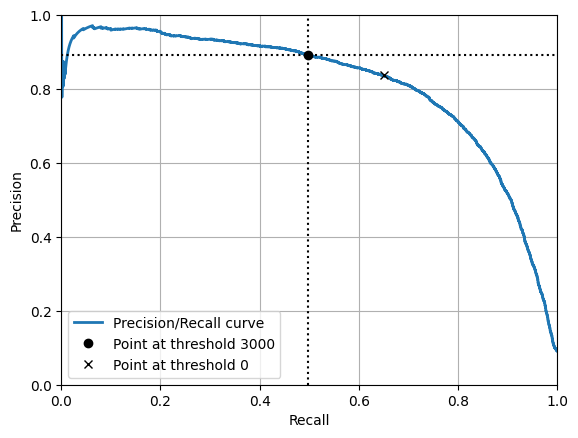

In [59]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot(recalls[idx_3000], precisions[idx_3000], "ko", label="Point at threshold 3000")
plt.vlines(recalls[idx_3000], 0, 1, "k", "dotted")
plt.hlines(precisions[idx_3000], 0, 1, "k", "dotted")

plt.plot(recalls[idx_0], precisions[idx_0], "kx", label="Point at threshold 0")

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
idx_for_90_precision = (precisions>=0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
idx_for_90_precision, threshold_for_90_precision

(57109, 3370.0194991439557)

In [61]:
y_train_pred_90 = y_scores>=threshold_for_90_precision

In [62]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [63]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## 5. The ROC Curve

- ROC = receiver operating characteristic
- ROC curve is a common tool used with binary classifiers
- True positive rate (TPR) = recall
- False positive rate (FPR) = ratio of negative instances that are incorrectly classified as positive

In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr, thresholds_roc = roc_curve(y_train_5, y_scores)

In [71]:
idx_for_threshold_at_90 = (thresholds_roc <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

In [72]:
idx_for_50_precision = (precisions>=0.5).argmax()
threshold_for_50_precision = thresholds[idx_for_50_precision]
idx_for_threshold_at_50 = (thresholds_roc <= threshold_for_50_precision).argmax()
tpr_50, fpr_50 = tpr[idx_for_threshold_at_50], fpr[idx_for_threshold_at_50]

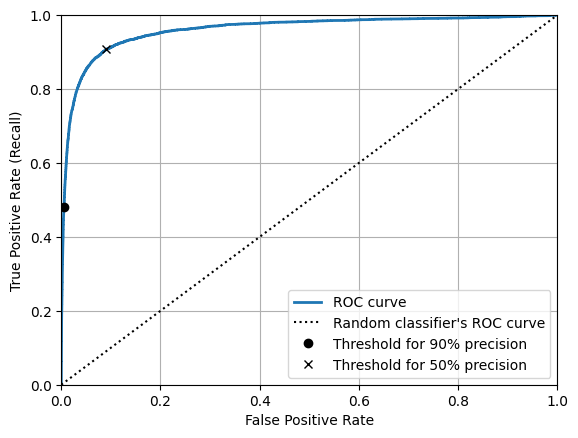

In [73]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.plot([fpr_50], [tpr_50], "kx", label="Threshold for 50% precision")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid(True)
plt.show()

- One way to compare classifiers is to measure the area under the curve (AUC).
- A perfect classifier will have a ROC AUC equal to 1.
- a purely random classifier will have a ROC AUC equal to 0.5

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest_clf = RandomForestClassifier(random_state=42)

In [78]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [79]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [80]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
y_train_5, y_scores_forest)

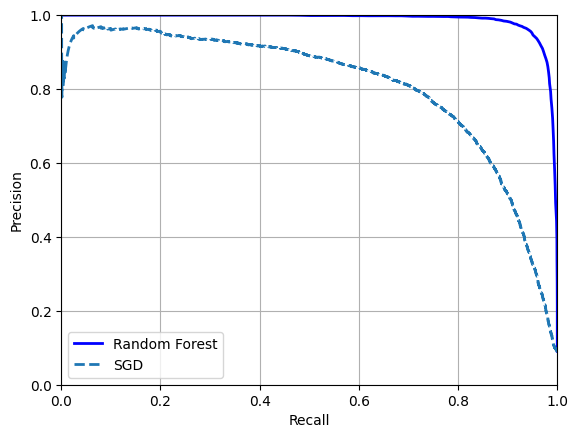

In [83]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [85]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classification

- To distinguish between more than two classes.

In [86]:
from sklearn.svm import SVC

In [87]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [88]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [89]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [90]:
class_id = some_digit_scores.argmax()
class_id

5

In [91]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [92]:
svm_clf.classes_[class_id]

'5'

In [93]:
from sklearn.multiclass import OneVsRestClassifier

In [95]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [96]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [97]:
ovr_clf.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [98]:
len(ovr_clf.estimators_)

10

In [99]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

^Oops, incorrect! Prediction error.

In [100]:
sgd_clf.decision_function([some_digit]).round(2)

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

In [101]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
X_train_scales = scaler.fit_transform(X_train.astype("float64"))

In [106]:
cross_val_score(sgd_clf, X_train_scales, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

In [108]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

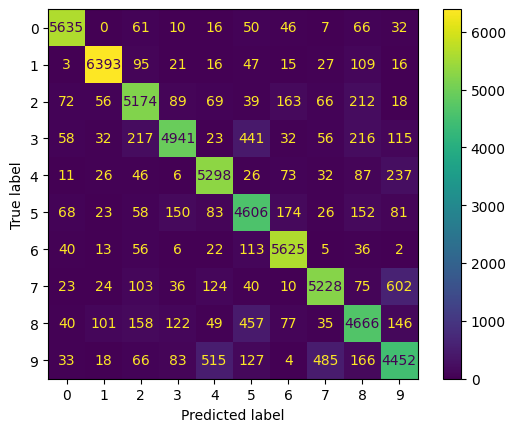

In [110]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

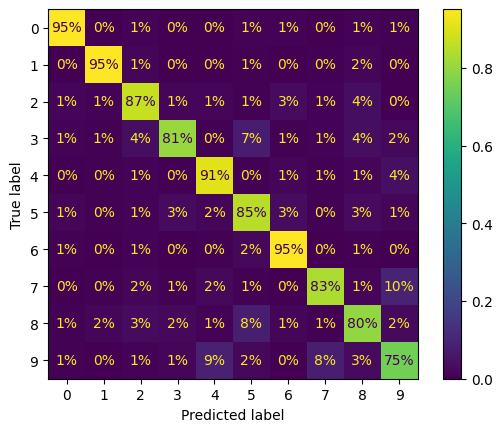

In [112]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

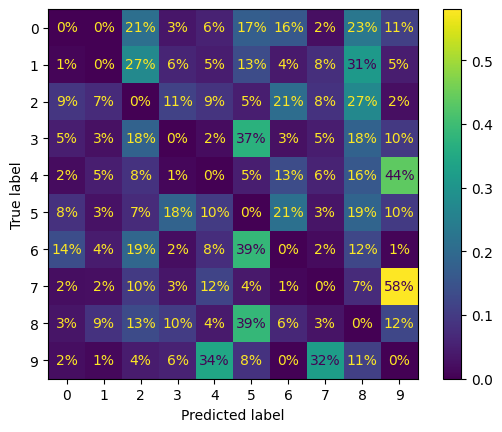

In [113]:
sample_weight = (y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

# Multilabel Classification

In [114]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [115]:
y_train_large = (y_train>='7')
y_train_odd = (y_train.astype('int8')%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [116]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [117]:
knn_clf.predict([some_digit])

array([[False,  True]])

Evaluation:

In [118]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [119]:
from sklearn.multioutput import ClassifierChain

In [120]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [121]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

- generalization of multilabel classification where each label can be multiclass.

In [122]:
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

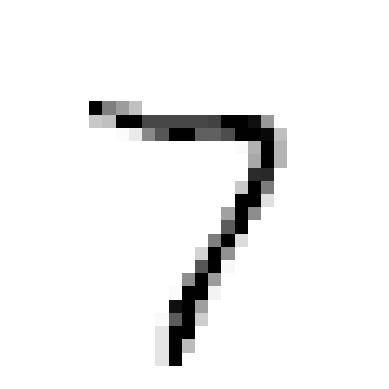

In [123]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()